<a href="https://colab.research.google.com/github/tomohitom/Tennis_Game_Analysis/blob/master/tennis_stats_analysis/stats_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

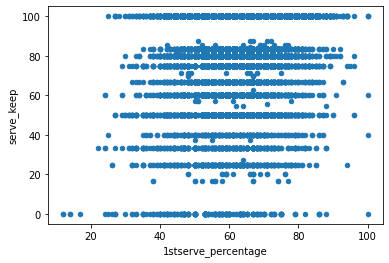

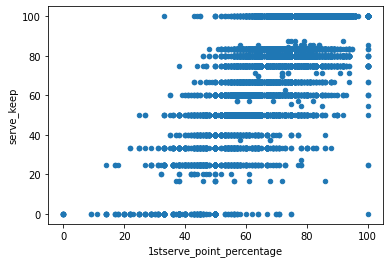

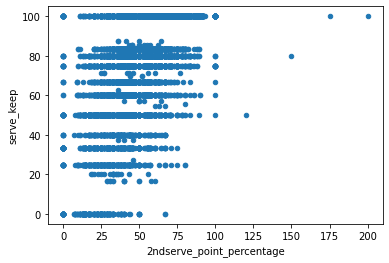

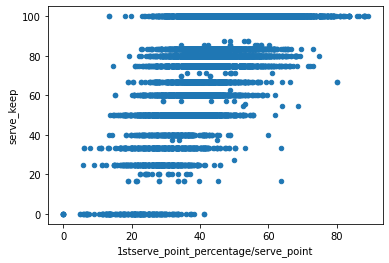

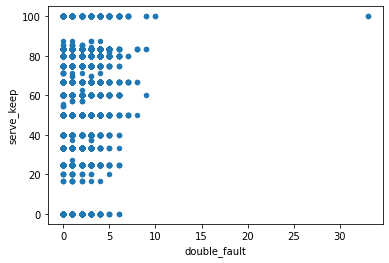

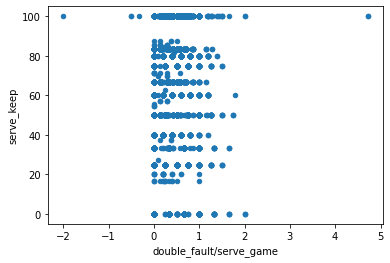

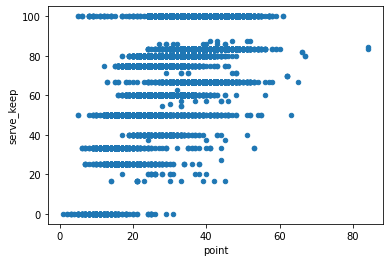

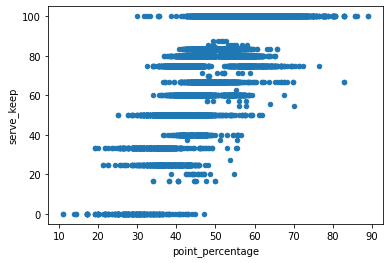

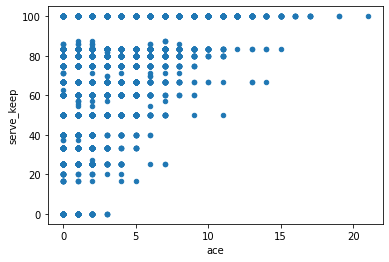

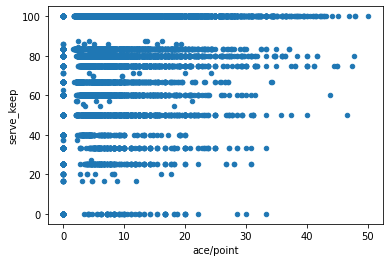

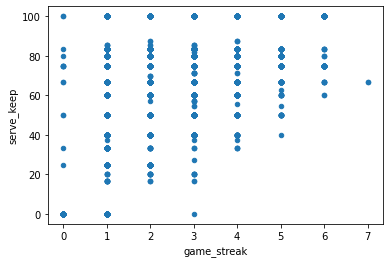

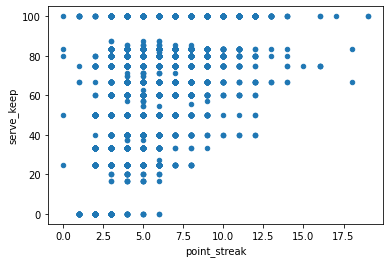

In [1]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("sample_data/game_stats.csv")

col = ['1stserve_percentage', '1stserve_point_percentage','2ndserve_point_percentage', '1stserve_point_percentage/serve_point', 'double_fault', 'double_fault/serve_game', 'point', 'point_percentage', 'ace', 'ace/point', 'game_streak', 'point_streak']

%matplotlib inline
for name in col:
    df.plot(kind = "scatter", x = name, y = "serve_keep")

In [2]:
df.columns

Index(['1stserve_percentage', '1stserve_point_percentage',
       '2ndserve_point_percentage', '1stserve_point_percentage/serve_point',
       'double_fault', 'double_fault/serve_game', 'serve_keep', 'point',
       'point_percentage', 'ace', 'ace/point', 'game_streak', 'point_streak',
       'set_result', 'Unnamed: 14'],
      dtype='object')

In [11]:
df = df.drop(df[df["2ndserve_point_percentage"] > 100].index, axis = 0)
df.dropna(how = "any", axis = 0, inplace = True)

In [12]:
X = df[col]
y = df["serve_keep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8040427443477647

In [13]:
se = df.corr()["serve_keep"]
abs_cor = se.map(abs)
abs_cor.sort_values(ascending = False)

serve_keep                               1.000000
1stserve_point_percentage                0.731367
point_percentage                         0.729057
1stserve_point_percentage/serve_point    0.658582
set_result                               0.622106
2ndserve_point_percentage                0.573391
point                                    0.564535
game_streak                              0.417489
point_streak                             0.352898
ace                                      0.332224
double_fault/serve_game                  0.241377
ace/point                                0.206431
1stserve_percentage                      0.185555
double_fault                             0.119273
Name: serve_keep, dtype: float64

In [14]:
col2 = ['1stserve_percentage', '1stserve_point_percentage', '1stserve_point_percentage/serve_point', 'point_percentage']
X2 = df[col2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

0.6719477937432933

In [15]:
X2["double_fault/serve_game2"] = df["double_fault/serve_game"] ** 2

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.6778759252188328

In [16]:
X2["1st + 2nd"] = df["1stserve_point_percentage"] + df["2ndserve_point_percentage"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_test, y2_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.7490791292714906

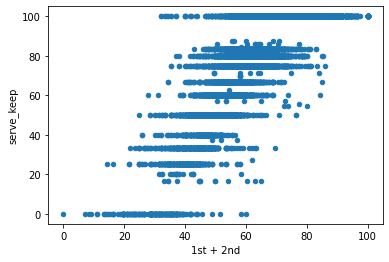

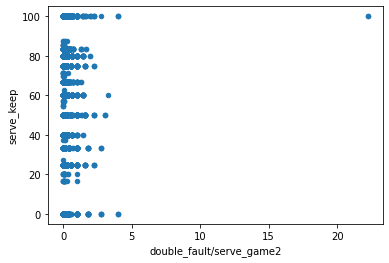

In [27]:
df["1st + 2nd"] = (df["1stserve_point_percentage"] + df["2ndserve_point_percentage"]) / 2
df["double_fault/serve_game2"] = df["double_fault/serve_game"] ** 2
df.plot(kind = "scatter", x = "1st + 2nd", y = "serve_keep")
df.plot(kind = "scatter", x = "double_fault/serve_game2", y = "serve_keep")

In [28]:
se = df.corr()["serve_keep"]
abs_cor = se.map(abs)
abs_cor.sort_values(ascending = False)

serve_keep                               1.000000
1st + 2nd                                0.813874
1stserve_point_percentage                0.731367
point_percentage                         0.729057
1stserve_point_percentage/serve_point    0.658582
set_result                               0.622106
2ndserve_point_percentage                0.573391
point                                    0.564535
game_streak                              0.417489
point_streak                             0.352898
ace                                      0.332224
double_fault/serve_game                  0.241377
ace/point                                0.206431
1stserve_percentage                      0.185555
double_fault/serve_game2                 0.157030
double_fault                             0.119273
double_fault/serve_game4                 0.001690
Name: serve_keep, dtype: float64

In [29]:
col3 = ['1stserve_percentage', '1stserve_point_percentage', '1stserve_point_percentage/serve_point', 'point_percentage', "1st + 2nd", "double_fault/serve_game"]
X3 = df[col3]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.2, random_state = 0)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
model3.score(X3_test, y3_test)

0.7486679516784803

In [30]:
df.columns

Index(['1stserve_percentage', '1stserve_point_percentage',
       '2ndserve_point_percentage', '1stserve_point_percentage/serve_point',
       'double_fault', 'double_fault/serve_game', 'serve_keep', 'point',
       'point_percentage', 'ace', 'ace/point', 'game_streak', 'point_streak',
       'set_result', 'Unnamed: 14', '1st + 2nd', 'double_fault/serve_game2',
       'double_fault/serve_game4'],
      dtype='object')

In [33]:
col4 = ['1stserve_percentage', '1stserve_point_percentage', '2ndserve_point_percentage', '1stserve_point_percentage/serve_point', 'double_fault', 'double_fault/serve_game', 'point', 'point_percentage', 'ace', 'ace/point', 'game_streak', 'point_streak', '1st + 2nd', 'double_fault/serve_game2']
X4 = df[col4]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.2, random_state = 0)

model4 = LinearRegression()
model4.fit(X4_train, y4_train)
model4.score(X4_test, y4_test)

0.8041230560438273

0.8041230560438273